In [14]:
import torch
from dataset import test_dataset

from model import UNET
from utils import display_images

model = UNET(channels=[3, 64, 128, 256, 512], out_channels=1)
model.load_state_dict(torch.load("mymodel2.pth", map_location=torch.device("cpu")))
img, mask = test_dataset[11]

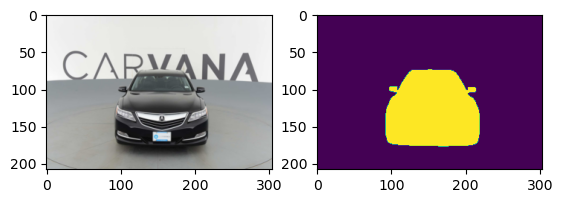

In [15]:
display_images(img,mask)

tensor([[[[-1.3727, -1.1567, -1.7308,  ..., -1.8273, -1.5617, -1.6035],
          [-1.1979, -1.4340, -1.6102,  ..., -1.9129, -2.0832, -1.8595],
          [-1.4593, -1.3806, -1.5172,  ..., -1.8906, -1.9395, -1.8441],
          ...,
          [-1.2579, -1.5918, -1.6826,  ..., -1.6912, -1.7863, -1.3755],
          [-1.5232, -1.5307, -1.6629,  ..., -1.4639, -1.2891, -1.0136],
          [-1.2625, -1.6145, -1.8309,  ..., -1.5729, -1.5098, -1.1728]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([3, 208, 304])
torch.Size([1, 208, 304])


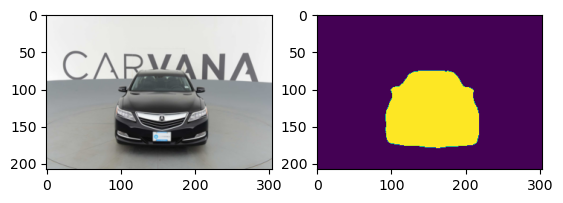

tensor(0.0039)

In [16]:
model.eval()

preds = model(torch.unsqueeze(img, 0))
print(preds)
preds = (torch.sigmoid(preds)>0.5).float()
print(img.shape)
print(preds[0,:,:,:].shape)
display_images(img, preds[0,:,:,:])
torch.max(mask)

In [11]:
import matplotlib.pyplot as plt

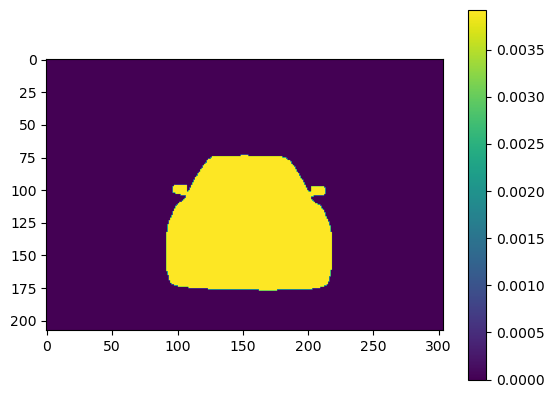

In [13]:
plt.imshow(mask[0,:,:])
plt.colorbar()
plt.show()